In [14]:
#pip install google-services-api
!pip install xlrd

In [2]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from scipy.stats import linregress
from pprint import pprint
from config import g_key
from config import outscraper_key
from datetime import datetime

from outscraper import ApiClient



In [81]:
target_city = "Denver, Colorado"
target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
    'address={0}&key={1}').format(target_city, g_key)

geo_data = requests.get(target_url).json()

lat = geo_data["results"][0]["geometry"]["location"]["lat"]
lng = geo_data["results"][0]["geometry"]["location"]["lng"]

# Print the latitude and longitude
print('''
    City: {0}
    Latitude: {1}
    Longitude: {2}
    '''.format(target_city, lat, lng))


    City: Denver, Colorado
    Latitude: 39.7392358
    Longitude: -104.990251
    


In [20]:
target_coordinates = "39.7392358, -104.990251"
target_search = "venues"
target_radius = 10000
target_type = "concert"

params = {
    "location": target_coordinates,
    "keyword": target_search,
    "radius": target_radius,
    "type": target_type,
    "key": g_key
}

# base url- nearbysearch
base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"

# run a request using our params dictionary
response = requests.get(base_url, params=params)

In [22]:
#places_data = response.json()

# Print the json (pretty printed)
#print(json.dumps(places_data, indent=4, sort_keys=True))

In [35]:
# Red Rocks Park and Amphitheater Place ID = ChIJ18hsDtqCa4cRrdYsOQfng3w
# Fiddlers Green Amphitheatre Place ID = ChIJOZ2mWoiGbIcRnK8qOzprxr8

query_url = "https://maps.googleapis.com/maps/api/place/details/json"
place_id = "ChIJ18hsDtqCa4cRrdYsOQfng3w"

params = {
    "place_id": place_id,
    "key": g_key}

response = requests.get(query_url, params)
redrocks_data = response.json()

print(json.dumps(redrocks_data, indent=4, sort_keys=True))


{
    "html_attributions": [],
    "result": {
        "address_components": [
            {
                "long_name": "18300",
                "short_name": "18300",
                "types": [
                    "street_number"
                ]
            },
            {
                "long_name": "West Alameda Parkway",
                "short_name": "W Alameda Pkwy",
                "types": [
                    "route"
                ]
            },
            {
                "long_name": "Morrison",
                "short_name": "Morrison",
                "types": [
                    "locality",
                    "political"
                ]
            },
            {
                "long_name": "Jefferson County",
                "short_name": "Jefferson County",
                "types": [
                    "administrative_area_level_2",
                    "political"
                ]
            },
            {
                "long_name": "Colorado",

In [33]:
date = datetime.utcfromtimestamp(1595471580).date()
date.year
date.month

7

In [75]:
print(redrocks_data['result']['reviews'][1]['rating'])
print(redrocks_data['result']['reviews'][1]['time'])

5
1602604586


In [ ]:
redrocks_ratings = []
redrocks_date = []

params = {'key': g_key}


    

In [66]:
pprint(redrocks_data)

{'html_attributions': [],
 'result': {'address_components': [{'long_name': '18300',
                                    'short_name': '18300',
                                    'types': ['street_number']},
                                   {'long_name': 'West Alameda Parkway',
                                    'short_name': 'W Alameda Pkwy',
                                    'types': ['route']},
                                   {'long_name': 'Morrison',
                                    'short_name': 'Morrison',
                                    'types': ['locality', 'political']},
                                   {'long_name': 'Jefferson County',
                                    'short_name': 'Jefferson County',
                                    'types': ['administrative_area_level_2',
                                              'political']},
                                   {'long_name': 'Colorado',
                                    'short_name': 'CO',
    

In [67]:
#fiddlers_data = "C:/Users/paul_/workspace/ATeamProjectPy/input_data_reviews/Fiddlers_Green_Reviews.xlsx"
fiddlers_df = pd.read_excel("input_data/Fiddler's Green Reviews.xlsx")
fiddlers_df.head()

,google_id,autor_link,autor_name,autor_id,review_text,review_img_url,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes
0,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1117889063...,Carla Romero,111788906317735192731,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,4,1577753856,12/31/2019 00:57:36,0
1,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1052544996...,kayla scott,105254499609271761375,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577652536,12/29/2019 20:48:56,0
2,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1001612728...,Justin Brandenburg,100161272803201103908,Fun venue,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577590672,12/29/2019 03:37:52,0
3,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1117712780...,Nathaly Mora,111771278008972827620,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577564182,12/28/2019 20:16:22,0
4,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1173905419...,Chrissy,117390541915050839567,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577517538,12/28/2019 07:18:58,0


In [68]:
# Function to convert UTC Timestamp to a YearMonth number
def timeDiff(row):

    review_date = datetime.utcfromtimestamp(row["review_timestamp"]).date()
    return review_date.year*100+review_date.month


In [69]:
fiddlers_df["Review Date"]=fiddlers_df.apply(timeDiff, axis=1)
fiddlers_df.head()

,google_id,autor_link,autor_name,autor_id,review_text,review_img_url,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,Review Date
0,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1117889063...,Carla Romero,111788906317735192731,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,4,1577753856,12/31/2019 00:57:36,0,201912
1,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1052544996...,kayla scott,105254499609271761375,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577652536,12/29/2019 20:48:56,0,201912
2,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1001612728...,Justin Brandenburg,100161272803201103908,Fun venue,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577590672,12/29/2019 03:37:52,0,201912
3,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1117712780...,Nathaly Mora,111771278008972827620,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577564182,12/28/2019 20:16:22,0,201912
4,0x876c86885aa69d39:0xbfc66b3a3b2aaf9c,https://www.google.com/maps/contrib/1173905419...,Chrissy,117390541915050839567,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1577517538,12/28/2019 07:18:58,0,201912


In [72]:
fiddlers_reviews = fiddlers_df[["review_rating", "Review Date"]]
fiddlers_reviews.head(2664)

,review_rating,Review Date
0,4,201912
1,5,201912
2,5,201912
3,5,201912
4,5,201912
...,...,...
2638,5,201801
2639,4,201801
2640,5,201801
2641,4,201801


In [82]:
#month_counts = fiddlers_reviews['Review Date'].value_counts()
fiddlers_counts = fiddlers_reviews.copy()

ranges = [201800, 201804, 201807, 201810, 201901, 201904, 201907, 201910, 201912]
bins = ["Winter 2018", "Spring 2018", "Summer 2018", "Fall 2018", "Winter 2019", "Spring 2019", "Summer 2019", "Fall 2019"]

fiddlers_counts["Seasonal Ratings"] = pd.cut(fiddlers_counts["Review Date"], ranges, labels = bins)

fidd_seas_counts = fiddlers_counts.groupby(["Seasonal Ratings"]).count()
fidd_seas_counts

,review_rating,Review Date
Seasonal Ratings,,
Winter 2018,130,130
Spring 2018,542,542
Summer 2018,731,731
Fall 2018,86,86
Winter 2019,93,93
Spring 2019,344,344
Summer 2019,658,658
Fall 2019,59,59


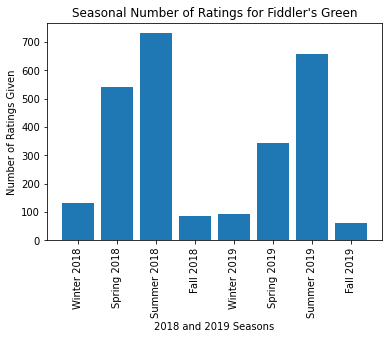

In [90]:
x_axis = np.arange(8)
review_count = fidd_seas_counts['Review Date']

plt.bar(x_axis, review_count)
plt.title("Seasonal Number of Ratings for Fiddler's Green")
plt.xlabel("2018 and 2019 Seasons")
plt.ylabel("Number of Ratings Given")
seasonal_values = [value for value in x_axis]
plt.xticks(seasonal_values, ["Winter 2018", "Spring 2018", "Summer 2018", "Fall 2018",
                             "Winter 2019", "Spring 2019", "Summer 2019", "Fall 2019"], rotation = 'vertical');

In [60]:

month_counts = fiddlers_reviews['Review Date'].value_counts()
month_counts

201808    392
201908    356
201909    248
201806    227
201809    219
201907    200
201807    187
201805    128
201810    120
201906    101
201910     54
201804     52
201904     49
201905     43
201812     39
201911     35
201801     35
202002     27
201803     26
201811     26
201912     25
201902     23
202001     22
201901     21
201903     21
201802     17
202003     10
202007      4
202005      4
202009      3
202004      2
Name: Review Date, dtype: int64

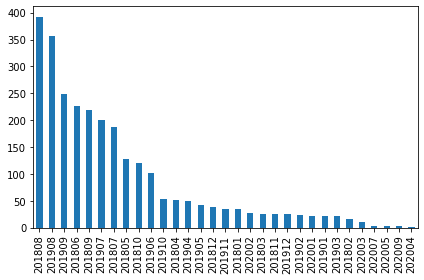

In [57]:
months_chart = month_counts.plot(kind='bar')
plt.tight_layout()

In [27]:
fiddlers_reviews['review_rating'].mean()

4.380338733431517

In [51]:
mishawaka_df = pd.read_excel("input_data/Mishawaka Reviews.xlsx")
mishawaka_df.head()

,google_id,autor_link,autor_name,autor_id,review_text,review_img_url,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes
0,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1078451132...,Chris Johnson,107845113214903881366,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1603384241,10/22/2020 16:30:41,0
1,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1051923253...,Austin Kohler,105192325321102897658,Scenic venue with great sound and an even bett...,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1603216975,10/20/2020 18:02:55,0
2,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1032131870...,Bobbi Watts,103213187014515593336,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1602556781,10/13/2020 02:39:41,0
3,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1133011753...,Victoria Chronister,113301175345399746162,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1602526469,10/12/2020 18:14:29,0
4,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1035431020...,Quinn Sweetman,103543102087890376027,Attended a private memorial service here. Very...,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1602441168,10/11/2020 18:32:48,0


In [52]:
mishawaka_df["Review Date"]=mishawaka_df.apply(timeDiff, axis=1)
mishawaka_df.head()

,google_id,autor_link,autor_name,autor_id,review_text,review_img_url,owner_answer,owner_answer_timestamp,owner_answer_timestamp_datetime_utc,review_link,review_rating,review_timestamp,review_datetime_utc,review_likes,Review Date
0,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1078451132...,Chris Johnson,107845113214903881366,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1603384241,10/22/2020 16:30:41,0,202010
1,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1051923253...,Austin Kohler,105192325321102897658,Scenic venue with great sound and an even bett...,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1603216975,10/20/2020 18:02:55,0,202010
2,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1032131870...,Bobbi Watts,103213187014515593336,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1602556781,10/13/2020 02:39:41,0,202010
3,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1133011753...,Victoria Chronister,113301175345399746162,NaN,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1602526469,10/12/2020 18:14:29,0,202010
4,0x87693da025a9b9fb:0x3176f4eacc0520,https://www.google.com/maps/contrib/1035431020...,Quinn Sweetman,103543102087890376027,Attended a private memorial service here. Very...,NaN,NaN,NaN,NaN,https://www.google.com/maps/reviews/data=!4m5!...,5,1602441168,10/11/2020 18:32:48,0,202010


In [53]:
mishawaka_reviews = mishawaka_df[["review_rating", "Review Date"]]
mishawaka_reviews.head()

,review_rating,Review Date
0,5,202010
1,5,202010
2,5,202010
3,5,202010
4,5,202010


In [31]:
mishawaka_reviews["review_rating"].mean()

4.631147540983607

In [ ]:

winter_2019 = []
sprint_2019 = []
summer_2019 = []
fall_2019 = []

for 